# LINEAR REGRESSION


the output label is a numeric variable.

now there are two classifications: simple and multiple, depending on the number of attributes -**X**- present in the Dataset.


A simple linear regression comes with the following and known formula:

$Y = mX + b$

m: slope

b: intercept

## SIMPLE LIEAR REGRESSION
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
```

we're going to graph the following expression:

$y = 3x - 2$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
n = 500
X = np.linspace(-2,3,n)
y_real = 3*X - 2
y = y_real +np.random.randn(n)

 Graficar la ecuacion anterior. Los datos verdes son los datos reales y los rojos es lo que se supone dara como resultado la prediccion 

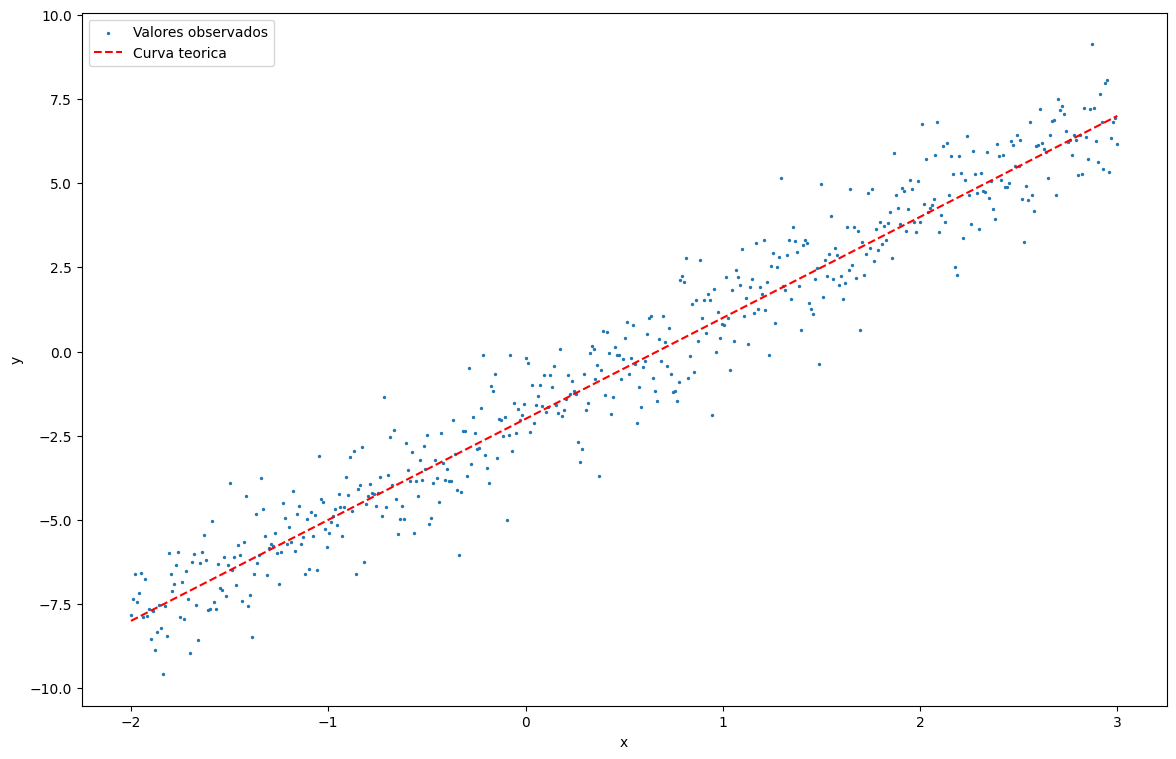

In [7]:
plt.figure(figsize = (14 , 9))
plt.scatter(X, y, 
             s=2,
             label = 'Valores observados')
plt.plot(X, y_real,
         '--',
         label = 'Curva teorica',
         c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Instanciar y usar el modelo de regresion lineal

In [8]:
from sklearn.linear_model import LinearRegression

LinealRegressor = LinearRegression()

# Proceed with the training
LinealRegressor.fit(X.reshape(-1, 1), y)

LinearRegression()

__CALCULO DE PENDIENTE E INTERCEPTO HECHO A MANO PARA PODER COMPARA CON EL ALGORITMO__

In [10]:
# pendiente
a = (n * (X*y).sum() - X.sum() * y.sum()) / (n * (X**2).sum() - X.sum()**2)
print("La pendiente obtenida manualmente es:", a)
# intercepeto
b = (y.sum() - a * X.sum()) / n
print("La ordenada al orígen obtenida manualmente es:", b)

La pendiente obtenida manualmente es: 3.0131371613894524
La ordenada al orígen obtenida manualmente es: -1.8922827416545296


Verificacion del aprendizaje

In [9]:
# validando la pendiente
print(f'La pendiente obtenida es: {LinealRegressor.coef_}')
# validando el intecpto
print(f'La ordenada al origen es: {LinealRegressor.intercept_}')

La pendiente obtenida es: [3.01313716]
La ordenada al origen es: -1.8922827416545287


__A CONTINUACION se va a proceder a hacer la particion de la data en los sub-grupos de entrenamiento y testeo__

In [12]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(350, 1) (150, 1) (350,) (150,)


**Entrenar el modelo con `X`, `y` `_train`**

In [13]:
LinealRegressor.fit(X_train, y_train)

LinearRegression()

In [14]:
# predecir las etiquetas de salida`y` en los sub-set de prueba y testeo
y_train_pred = LinealRegressor.predict(X_train) # entrenamiento
y_test_pred = LinealRegressor.predict(X_test) # entrenamiento)

In [19]:
# Observar el aprendizaje a partir de los sub-sets de prueba y entrenamiento

print(f'La pendiente es: {LinealRegressor.coef_}')
print(f'El intercepto es: {LinealRegressor.intercept_}')

La pendiente es: [2.99483748]
El intercepto es: -1.9342443330344672


__GRAFICAR la curva predicha con los sets de entrenamiento y prueba__

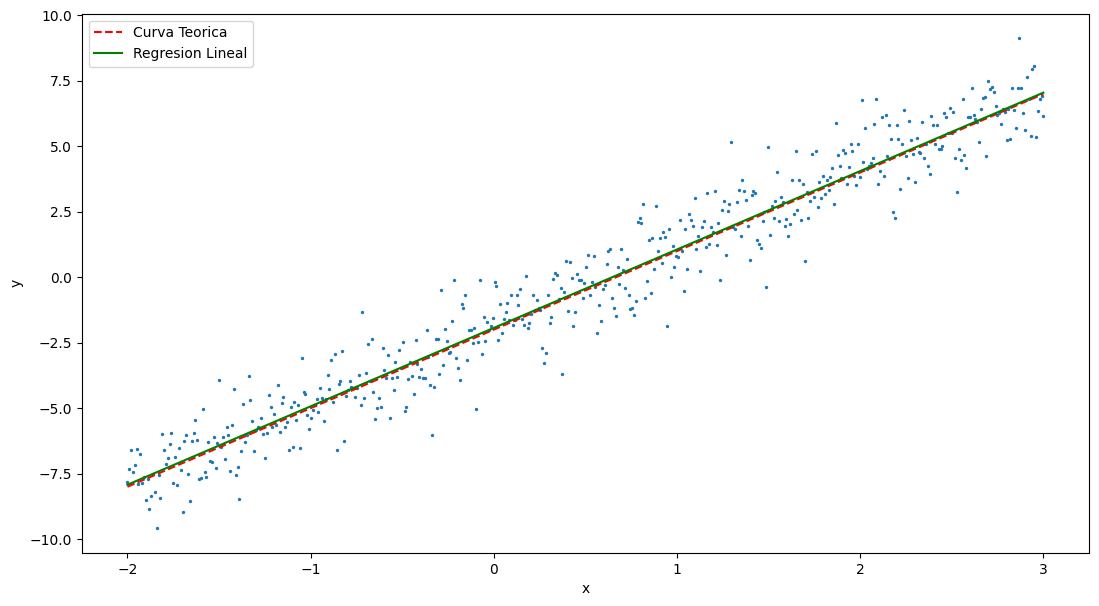

In [21]:
plt.figure(figsize=(13 ,7))
plt.scatter(X, y, s=2)
plt.plot(X, y_real, 
         '--', 
         label='Curva Teorica', 
         c = 'r')
plt.plot(X, LinealRegressor.predict(X),
         label = 'Regresion Lineal',
         c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## __EVALUAR EL MODELO__

### *MAE (Mean Absolute Error)*

<img src="https://cdn-images-1.medium.com/max/800/1*8DXbECB9pnKxTpIvuVD-vg.png">

Esta métrica suma los valores absolutos de los errores sobre cada isntancia y luego las promedia para obtener el error promedio.

El problema, en este caso, es que el error va a ser mayor cuantas más muestras haya.

### *MSE (Mean Squared Error)*

<img src= "https://pbs.twimg.com/media/Etuc3lBXcAEH7wO.png"
style = "width:375px; height:200px">

Aquí, en lugar de tomar el valor absoluto, tomamos el cuadrado del error.

La desventaja, ahora, es que al estar elevado al cuadrado, el error no tiene la misma magnitud ni unidad que la variable **Y**.

Por ello, se suele aplicar la raíz.

### *RMSE (Root Mean Squared Error)*

<img src= "https://secureservercdn.net/160.153.137.16/70j.58d.myftpupload.com/wp-content/uploads/2019/03/rmse-2.png"
style = "width:375px; height:150px">

Como vemos, esta métrica consiste en aplicarle la raíz cuadrada al MSE.

Tanto MSE y RMSE son más sensibles a los valores atípicos (ya que elevan los errores de cada muestra al cuadrado).

Hay que tener presente que todas estas métricas que vimos miden errores. Con lo cual, a más bajo MAE, MSE o RMSE, mejor regresor. En un caso hipotético de perfección, los errores serán 0.



### *Coeficiente de determinación (R cuadrado)*


<img src= "https://economipedia.com/wp-content/uploads/R-Cuadrado-expresi%C3%B3n-300x192.jpg"
style = "width:300px; height:200px">

Dejamos para al final esta métrica que, al igual que el RMSE, es de las más aplicadas en la materia.

El coeficiente de determinación es la proporción de la varianza total de la variable explicada por la regresión. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar.

Su valor, a diferencia de las métricas que estuvimos viendo anteriormente, oscila entre 0 y 1.

Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será.

Cabe destacar, que Scikit-Learn aplica una variante denominada R cuadrado ajustada, en la que los valores obtenidos, sí pueden ser menores a 0, en caso de que el modelo tenga un ajuste a los datos muy bajo:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [22]:
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

from sklearn.metrics import mean_squared_error
import seaborn as sns

mqr_train = (mean_squared_error(y_train,
                          y_train_pred, 
                          squared = False))
mqr_test = (mean_squared_error(y_test,
                               y_test_pred,
                               squared = False))

print(f'Raiz del error cuadratico medio en Train: {mqr_train}')
print(f'Raiz del error cuadratico medio en Test: {mqr_test}')


Raiz del error cuadratico medio en Train: 1.0134321578122747
Raiz del error cuadratico medio en Test: 1.0083442742626911


__SE GRAFICAN HISTOGRAMAS DE LOS ERRORES TANTO EN TRAIN COMO EN TEST__

HISTOGRAMAS DE ERRORES CUADRADOS


/var/folders/91/p86slnsd2yz1qxwjmvwpq6w00000gn/T/ipykernel_7242/2905433160.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred,
/var/folders/91/p86slnsd2yz1qxwjmvwpq6w00000gn/T/ipykernel_7242/2905433160.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_p

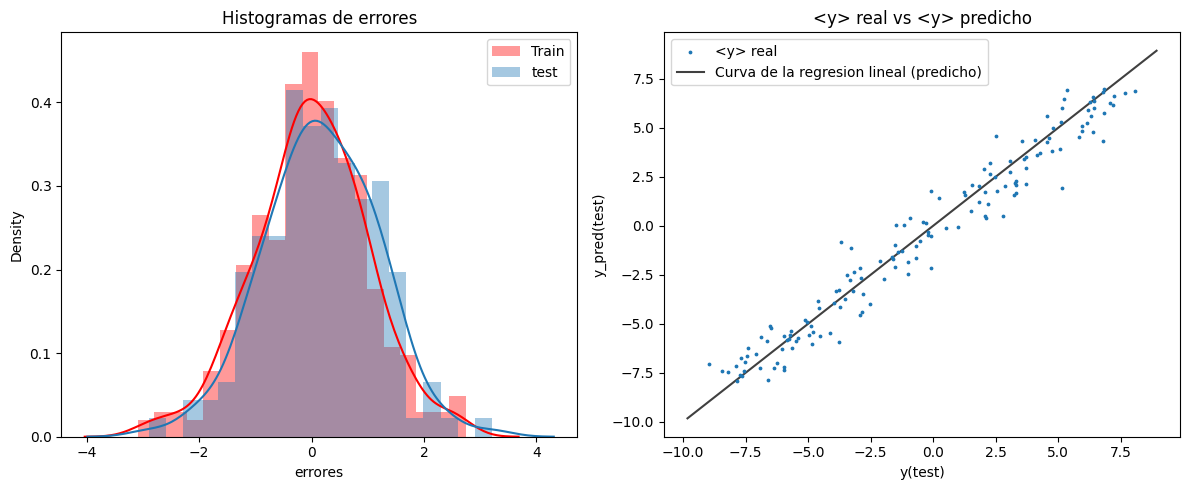

In [35]:
plt.figure(figsize=(12,5))

# histogramas de errores
print(f'HISTOGRAMAS DE ERRORES CUADRADOS')
plt.subplot(1,2,1)
plt.title('Histogramas de errores')
sns.distplot(y_train - y_train_pred, 
             bins = 20, 
             label = 'Train',
             color = 'r',
             kde  = True)
sns.distplot(y_test - y_test_pred,
             bins = 20,
             label = 'test',
             kde = True)
plt.xlabel('errores')
plt.legend()

# grafica de la prediccion
ax = plt.subplot(1,2,2)
plt.title('<y> real vs <y> predicho')
ax.scatter(y_test, 
           y_test_pred, 
           s = 3,
           label = '<y> real')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]

ax.plot(lims, lims, 'k-', 
        alpha = 0.75,
        zorder = 0,
        label = 'Curva de la regresion lineal (predicho)')

plt.xlabel('y(test)')
plt.ylabel('y_pred(test)')
plt.legend()
plt.tight_layout()
plt.show()
